In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#reading data
df = pd.read_csv("taedata.txt",header = None)
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


# Dataset Preparation

In [3]:
data=pd.DataFrame(df.values, columns = ["englishSpeaker", "CourseInstructor", "Course", "Semester","Classsize","grade"])
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
#separating Categorical features from dataframe
data1=pd.DataFrame(data,columns={"CourseInstructor","Course"})

In [5]:
#applying one-hot encoding
data2= pd.get_dummies(data1.Course,prefix='Course',drop_first=True)
data2.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#applying one-hot encoding on CourseInstructor
data3 = pd.get_dummies(data1.CourseInstructor, prefix='CourseInstructor',drop_first=True)
data3.head()

,CourseInstructor_2,CourseInstructor_3,CourseInstructor_4,CourseInstructor_5,CourseInstructor_6,CourseInstructor_7,CourseInstructor_8,CourseInstructor_9,CourseInstructor_10,CourseInstructor_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#converting binary features into 0 and 1
data4=pd.DataFrame(data,columns={"englishSpeaker"})
englishSpeaker1=[]
for i in data4.englishSpeaker:
    if i==1:
        englishSpeaker1.append(0)
    else :
        englishSpeaker1.append(1)
data4['englishSpeaker1']=englishSpeaker1
data4.head()

,englishSpeaker,englishSpeaker1
0,1,0
1,2,1
2,1,0
3,1,0
4,2,1


In [8]:
data5=pd.DataFrame(data,columns={"Semester"})

In [9]:
#converting binary features into 0 and 1
data5=pd.DataFrame(data,columns={"Semester"})
Semester1=[]
for i in data5.Semester:
    if i==1:
        Semester1.append(0)
    else :
        Semester1.append(1)
data5['Semester1']=Semester1
data5.head()

,Semester,Semester1
0,1,0
1,1,0
2,2,1
3,2,1
4,2,1


In [10]:
#combining the features
data6= pd.concat([data4, data5],axis=1)
data6.head()

,englishSpeaker,englishSpeaker1,Semester,Semester1
0,1,0,1,0
1,2,1,1,0
2,1,0,2,1
3,1,0,2,1
4,2,1,2,1


In [11]:
data7=pd.DataFrame(data6,columns={"englishSpeaker1","Semester1"})
data7.head()

,Semester1,englishSpeaker1
0,0,0
1,0,1
2,1,0
3,1,0
4,1,1


In [12]:
data8= pd.concat([data2, data3],axis=1)
data8.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data10=pd.concat([data8, data7],axis=1)
data10.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,Semester1,englishSpeaker1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [14]:
data9=pd.DataFrame(data,columns={"Classsize"})
data9.head()

,Classsize
0,19
1,17
2,49
3,33
4,55


# Feature Scaling (both StandardScaler and Min-max tried)

In [15]:
#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [16]:
classsize= sc.fit_transform(data9)


In [17]:
data11=pd.DataFrame(classsize, columns=['classsize']) 
data11.head()

,classsize
0,0.253968
1,0.222222
2,0.730159
3,0.476190
4,0.825397


In [18]:
X= pd.concat([data11, data10],axis=1)
X.head()

,classsize,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,Semester1,englishSpeaker1
0,0.253968,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.222222,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.730159,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.476190,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.825397,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [19]:
y=data['grade']
y.head()

0    3
1    3
2    3
3    3
4    3
Name: grade, dtype: int64

# Model Creation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [82]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print("The accuracy is ::::",accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)

The accuracy is :::: 0.625
[[4 2 1]
 [0 3 2]
 [1 0 3]]


In [84]:
rbf = SVC(kernel='rbf', gamma=1, C=8).fit(X_train, y_train)
rbf_predictions = rbf.predict(X_test) 
  
# model accuracy for X_test   
accuracy_rbf = rbf.score(X_test, y_test) 
print(accuracy_rbf)
# creating a confusion matrix 
cm = confusion_matrix(y_test, rbf_predictions) 
print(cm)

0.6875
[[3 2 2]
 [0 5 0]
 [1 0 3]]


In [85]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [86]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

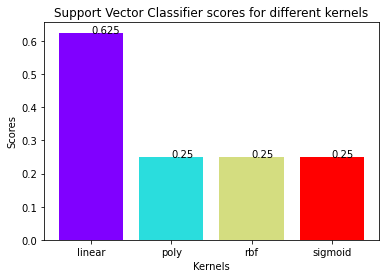

In [87]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [88]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'Linear'))

The score for Support Vector Classifier is 62.5% with Linear kernel.


# Decision Tree Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [47]:
dt_scores

[0.6451612903225806,
 0.4838709677419355,
 0.6451612903225806,
 0.6129032258064516,
 0.6129032258064516,
 0.5806451612903226,
 0.5483870967741935,
 0.5806451612903226,
 0.5161290322580645,
 0.6451612903225806,
 0.5806451612903226,
 0.6129032258064516,
 0.6129032258064516,
 0.4838709677419355,
 0.5483870967741935,
 0.5161290322580645,
 0.5483870967741935,
 0.5161290322580645,
 0.5483870967741935,
 0.6129032258064516,
 0.5483870967741935,
 0.7096774193548387,
 0.5161290322580645,
 0.5483870967741935,
 0.5483870967741935,
 0.5806451612903226,
 0.6451612903225806,
 0.5161290322580645,
 0.6129032258064516,
 0.6451612903225806,
 0.5483870967741935,
 0.6129032258064516,
 0.5161290322580645,
 0.5806451612903226,
 0.4838709677419355,
 0.6451612903225806,
 0.5483870967741935,
 0.5161290322580645,
 0.5483870967741935,
 0.5806451612903226,
 0.5806451612903226,
 0.5806451612903226,
 0.5161290322580645,
 0.5483870967741935,
 0.45161290322580644,
 0.5806451612903226,
 0.5806451612903226,
 0.516129032

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

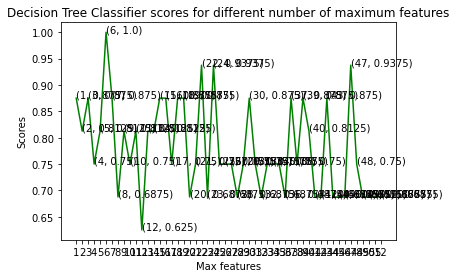

In [91]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [93]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[5]*100,6))

The score for Decision Tree Classifier is 100.0% with 6 maximum features.


In [58]:
dt_scores[21]

0.7096774193548387

# Random Forest Classifier

In [114]:
rf_scores = []
estimators = [1500, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

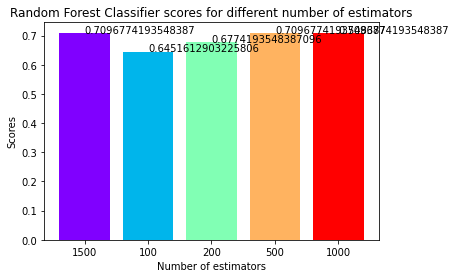

In [115]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [116]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[4]*100, [1500, 500]))

The score for Random Forest Classifier is 70.96774193548387% with [1500, 500] estimators.


In [117]:
rf_classifier = RandomForestClassifier(n_estimators =1500, random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [118]:
y_pred=rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy_score: 0.7096774193548387


In [119]:
print(confusion_matrix(y_test, y_pred))

[[7 0 0]
 [4 7 1]
 [1 3 8]]


In [120]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
             precision    recall  f1-score   support

          1       0.58      1.00      0.74         7
          2       0.70      0.58      0.64        12
          3       0.89      0.67      0.76        12

avg / total       0.75      0.71      0.71        31



# K Neighbors Classifier

In [98]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

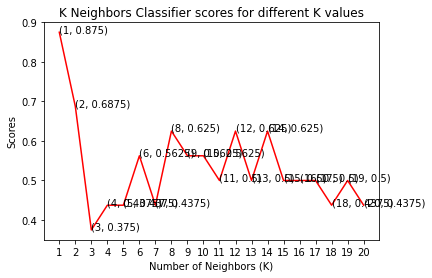

In [99]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [101]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[0]*100, 0))

The score for K Neighbors Classifier is 87.5% with 0 nieghbors.


# SVM Hyperparameter using Use GridsearchCV

In [102]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 500,1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.002], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.28888888888888886, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.002, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=0.1, gamma=0.002, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.002, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=0.24444444444444444, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=0.26666666666666666, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=0.24444444444444444, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.4444444444444444, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.3333333333333333, total=   0.0s
[CV] C=1, gamma=0.1, 

[CV]  C=500, gamma=0.0001, kernel=sigmoid, score=0.35555555555555557, total=   0.0s
[CV] C=500, gamma=0.002, kernel=sigmoid ..............................
[CV]  C=500, gamma=0.002, kernel=sigmoid, score=0.4222222222222222, total=   0.0s
[CV] C=500, gamma=0.002, kernel=sigmoid ..............................
[CV]  C=500, gamma=0.002, kernel=sigmoid, score=0.4888888888888889, total=   0.0s
[CV] C=500, gamma=0.002, kernel=sigmoid ..............................
[CV]  C=500, gamma=0.002, kernel=sigmoid, score=0.5333333333333333, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.37777777777777777, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.26666666666666666, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.4444444444444444, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.002], 'kernel': ['sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [103]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 500, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [104]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

             precision    recall  f1-score   support

          1       0.83      0.71      0.77         7
          2       0.60      0.60      0.60         5
          3       0.40      0.50      0.44         4

avg / total       0.65      0.62      0.64        16

